In [1]:
import tensorflow as tf
tf.random.set_seed(3)

In [2]:
from tensorflow import keras

In [3]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = sklearn.datasets.load_breast_cancer()

In [5]:
data_frame = pd.DataFrame(data.data,columns=data.feature_names)

In [6]:
data_frame['lables'] =data.target

In [7]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,lables
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
X = data_frame.drop(columns='lables',axis=1)
Y =data_frame['lables']

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2,test_size=0.2)

In [10]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
scaler  = StandardScaler()
X_train_std =scaler.fit_transform(X_train) 
X_test_std = scaler.fit_transform(X_test)

setting up the layers

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

In [14]:
#compiling nural network
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
             metrics=['accuracy'] )


In [15]:
#traing the nural network
history= model.fit(X_train_std,Y_train,validation_split=0.1,epochs=10)


Epoch 1/10
13/13 [==============================] - 1s 33ms/step - loss: 0.5114 - accuracy: 0.7726 - val_loss: 0.4344 - val_accuracy: 0.8261
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3416 - accuracy: 0.8753 - val_loss: 0.3015 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2640 - accuracy: 0.9046 - val_loss: 0.2385 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2225 - accuracy: 0.9340 - val_loss: 0.2012 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1939 - accuracy: 0.9438 - val_loss: 0.1757 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1729 - accuracy: 0.9462 - val_loss: 0.1561 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1563 - accuracy: 0.9511 - val_loss: 0.1406 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

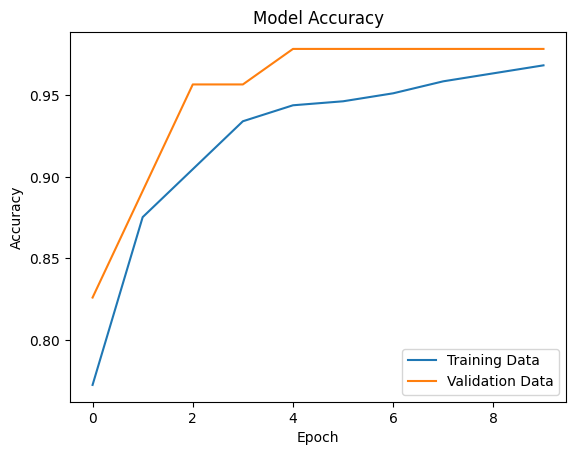

In [16]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show()

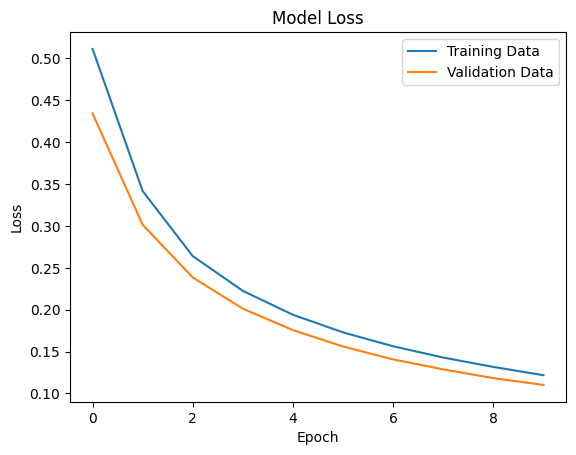

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper right')
plt.show()

accuracy of model on test

In [18]:
#accuracy
loss,accuracy = model.evaluate(X_test_std,Y_test)
print(accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.1329 - accuracy: 0.9474
0.9473684430122375


In [19]:
y_pred =model.predict(X_test_std)
print(y_pred[0])

4/4 [==============================] - 0s 3ms/step
[0.13236131 0.73323536]


In [20]:
print(X_test_std)

[[-0.08700339 -1.47192915 -0.10537391 ... -0.26629174 -1.09776353
  -0.65597459]
 [ 0.19989092  0.03577342  0.1706179  ...  0.44844054  0.06066588
   0.02108157]
 [-1.28858427 -0.21847659 -1.30667757 ... -1.41981535  0.19788632
  -0.31050377]
 ...
 [ 0.67523542  0.61546345  0.70329853 ...  1.36221218  1.000987
   0.62759948]
 [ 0.20832899  1.5866985   0.10942329 ... -1.35965118 -1.95719681
  -1.62740299]
 [ 0.78774299  0.03068842  0.84293725 ...  2.03773974  0.27299646
   0.34822356]]


In [21]:
print(y_pred)

[[0.13236131 0.73323536]
 [0.45830324 0.6953513 ]
 [0.04340269 0.96908534]
 [0.9917824  0.00304757]
 [0.4007242  0.7184127 ]
 [0.94437015 0.07063454]
 [0.16796666 0.7598249 ]
 [0.1402191  0.97880435]
 [0.13318756 0.9405029 ]
 [0.18369053 0.9507534 ]
 [0.5105184  0.6104163 ]
 [0.14818417 0.739775  ]
 [0.04336847 0.8391184 ]
 [0.19996168 0.7677273 ]
 [0.08033122 0.9563544 ]
 [0.8972151  0.09593854]
 [0.08870184 0.96896625]
 [0.05322316 0.91199976]
 [0.08043119 0.9832835 ]
 [0.7606999  0.12564807]
 [0.14212656 0.84161305]
 [0.11704599 0.96948624]
 [0.22663204 0.96221226]
 [0.08052725 0.96932226]
 [0.16468498 0.7940793 ]
 [0.8832872  0.11640376]
 [0.31355023 0.8483648 ]
 [0.36590627 0.7917027 ]
 [0.85207665 0.12370101]
 [0.9147657  0.08747338]
 [0.35319263 0.9181971 ]
 [0.11909142 0.91433126]
 [0.14473619 0.9620089 ]
 [0.9901165  0.03029403]
 [0.91478854 0.12111695]
 [0.2199241  0.9070685 ]
 [0.21369557 0.99056125]
 [0.4301766  0.916894  ]
 [0.04391018 0.92517966]
 [0.06488276 0.8647837 ]


model.predict gives the prddiction probability of raxh class for data point

In [22]:
#argmax function
my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [23]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


In [24]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 32ms/step
[[0.1571243 0.9711352]]
[1]
The tumor is Benign


c:\Users\himwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
